In [1]:
from tqdm import tqdm
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)  # Disable verbose tqdm output

# EXP3 Algorithm

See Chapter 11 in [Bandit Algorithms](https://tor-lattimore.com/downloads/book/book.pdf)

In [9]:
import numpy as np
from shinrl import BernoulliBandit 
from shinrl import Exp3Solver

In [13]:
# delta == 1 / n^2
n_step = 10000
env = BernoulliBandit(np.array([0.5, 0.55]))
config = Exp3Solver.DefaultConfig()
mixins = Exp3Solver.make_mixins(env, config)
solver = Exp3Solver.factory(env, config, mixins)


def calc_regret(lr, n_eval=5):
    config = Exp3Solver.DefaultConfig(
        lr=lr,
        verbose=False, 
        steps_per_epoch=n_step, 
        add_interval=1, 
    )
    
    regret = 0
    for seed in range(n_eval):
        config.seed = seed
        solver.initialize(env, config)
        solver.run()
        regret += solver.scalars["Regret"]["y"][-1]
    return regret / n_eval

2022-01-10T01:54:21.389390Z set_config is called.          config={'seed': 0, 'discount': 0.99, 'eval_trials': 10, 'eval_interval': 100, 'add_interval': 100, 'steps_per_epoch': 1000, 'verbose': True, 'exp3_type': <Exp3_TYPE.vanilla: 1>, 'lr': 0.1} env_id=None solver_id=MixedSolver-2
2022-01-10T01:54:21.390094Z set_env is called.             env_id=0 solver_id=MixedSolver-2
2022-01-10T01:54:21.392526Z Solver is initialized.         env_id=0 methods=['BaseSolver.__init__', 'Exp3Solver._total_rew_to_policy', 'History.add_scalar', 'BanditEvalMixIn.evaluate', 'History.init_history', 'BanditEvalMixIn.initialize', 'History.load', 'Exp3Solver.make_mixins', 'History.recent_summary', 'BaseSolver.run', 'History.save', 'BaseSolver.seed', 'History.set_config', 'BaseSolver.set_env', 'Exp3Solver.step', 'BanditEvalMixIn.update_regret'] mixins=[<class 'shinrl.solvers.bandit._bandit_eval_mixin.BanditEvalMixIn'>, <class 'shinrl.solvers.bandit.exp3_solver.Exp3Solver'>] solver_id=MixedSolver-2


In [14]:
solver.mixins

[shinrl.solvers.bandit._bandit_eval_mixin.BanditEvalMixIn,
 shinrl.solvers.bandit.exp3_solver.Exp3Solver]

In [15]:
lrs = np.linspace(0.001, 0.1, 10)
regrets_vanilla = []

for lr in lrs:
    print(f"Evaluating regrets of: lr=={lr}")
    regrets_vanilla.append(calc_regret(lr))

Evaluating regrets of: lr==0.001
Evaluating regrets of: lr==0.012
Evaluating regrets of: lr==0.023000000000000003
Evaluating regrets of: lr==0.034
Evaluating regrets of: lr==0.045000000000000005
Evaluating regrets of: lr==0.05600000000000001
Evaluating regrets of: lr==0.067
Evaluating regrets of: lr==0.07800000000000001
Evaluating regrets of: lr==0.08900000000000001
Evaluating regrets of: lr==0.1


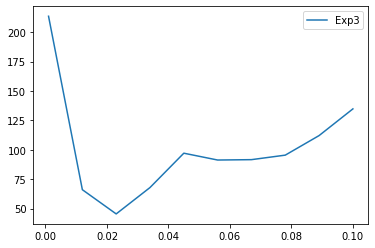

In [16]:
import matplotlib.pyplot as plt

plt.plot(lrs, regrets_vanilla, label="Exp3")
plt.legend()